# PreProcessing: Feature Selection

Feature Selection is an important step in data pre-processing. It consists in selecting the best subset of input variable as the most pertinent. Discarding irrelevant data is essential before applying Machine Learning algorithm in order to:
* *Reduce Overfitting*: less opportunity to make decisions based on noise;
* *Improve Accuracy*: less misleading data means modelling accuracy improves. Predictions can be greatly distorted by redundant attributes. 
* *Reduce Training Time*: With less data the algorithms will train faster;




### Data import
Data are imported from .csv file, splitted in **train_set** and **test_set** which are used by supervised algorithm. Otherwise with unsupervised algorithm the entire dataset will be processed. 

In [1]:
from sklearn.model_selection import train_test_split
from mypackage import methods as m
import pandas as pd



data = pd.read_csv('table.csv')

labels =  ['pop', 'dusaf', 'rete_fer', 'autostrad' , 'strade_pri', 'h_mean']
langs = ['pop', 'dusaf', 'rete_fer', 'autostrad',
                                 'strade_pri', 'strade_sec', 'h_mean','st_ferrov',
                                 'st_metro','int_prim','int_prim_s','int_sec','scn','dsf11',
                                 'dsf12','dsf13','dsf14','dsf2','dsf3','dsf4','dsf5']

temp= ['pop', 'dusaf', 'rete_fer', 'autostrad',
                                 'strade_pri', 'strade_sec', 'h_mean','st_ferrov',
                                 'st_metro','int_prim','int_prim_s','int_sec','scn','dsf11',
                                 'dsf12','dsf13','dsf14','dsf2','dsf3','dsf4','dsf5','dsfSum']
X  = pd.DataFrame(data, columns = labels)
X1 = pd.DataFrame(data, columns = langs)
Y = pd.DataFrame(data, columns= ['mov_tot']) #'mov_tot' - 'FBpop_tot'
Y = Y.values.ravel()
X_stand = (X-X.mean())/X.std()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

lat = pd.DataFrame(data, columns= ['lat'])
lat = lat['lat'].tolist()

lon = pd.DataFrame(data, columns= ['lon'])
lon = lon['lon'].tolist()


coords = list(zip(lat, lon))

Due to the fact there isn’t a best feature selection technique, many different methods are performed. The aim of this part is to discover by experimentation which one/ones work better for this specific problem. 
In this study, I choose supervised methods, which are classified into 3 groups, based on their  different approach.


## Filter Methods
Filter-based feature selection methods adopt statistical measures to evaluate the correlation/dependence between input variables.
These select features from the without machine learning algorithm. In terms of computation, they are very fast and are very suitable in order to remove duplicated, correlated, redundant variables. On the contrary,  these methods do not remove multicollinearity. 


In [2]:
#Pearson correlation index


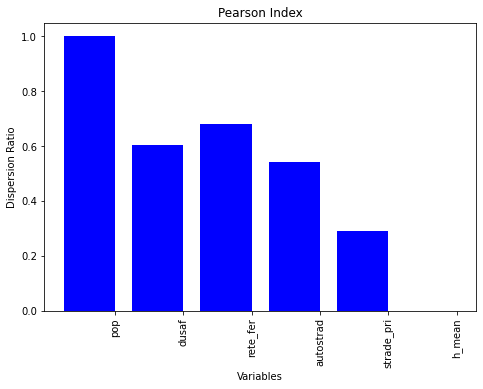

In [3]:
m.pearson(X, Y, labels)

### Spearmanr correlation


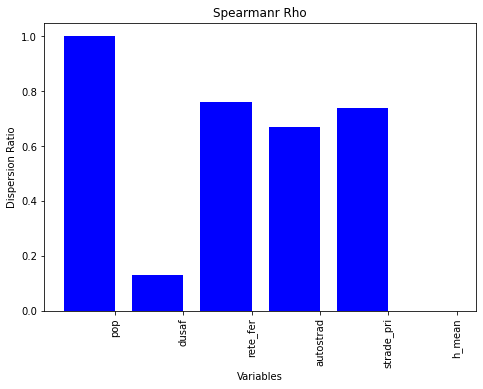

In [4]:
m.spearmanr(X, Y, labels)

### Kendall tau

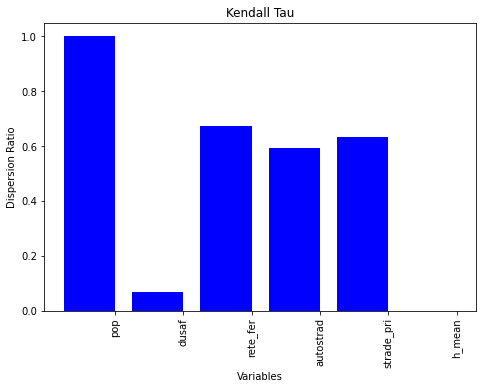

In [5]:
m.kendall(X, Y, labels)


### (Chi-square test not allowed with no categorical input)

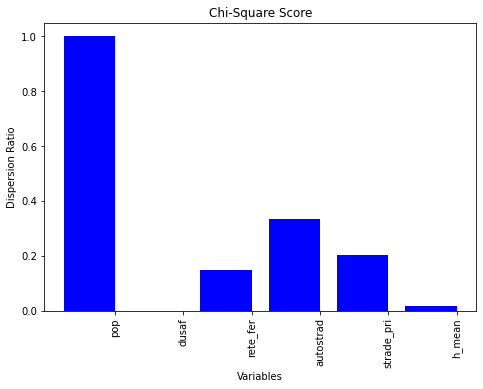

In [6]:
m.chi2_test(X_train, y_train, X_test, labels)

### F-Test

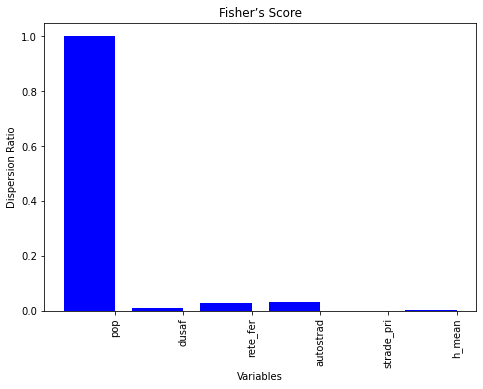

In [7]:
m.f_test(X_train, y_train, X_test, labels)

### Dispersion Ratio (Unsupervised)

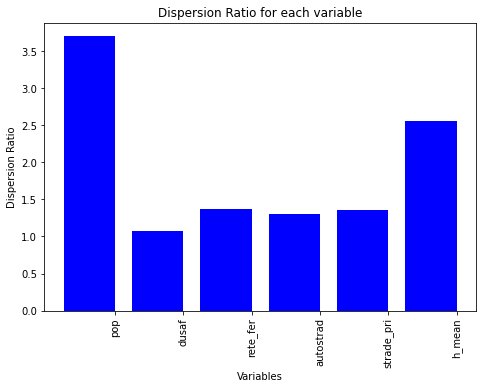

pop :  3.696779482494393
dusaf :  1.0777593900319926
rete_fer :  1.3740042429602914
autostrad :  1.2981032292376529
strade_pri :  1.3522066189992477
h_mean :  2.5542761802424105


In [8]:
m.compute_dispersion_ratio(X, labels)

### Variance Threshold (Unsupervised)

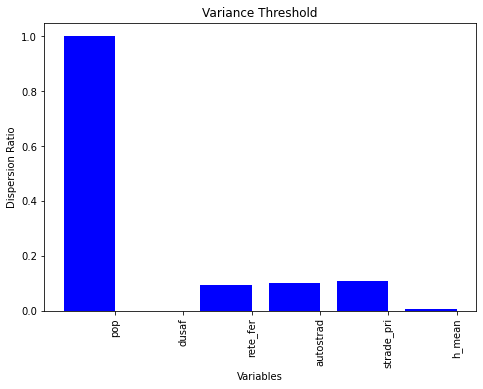

In [9]:
m.variance_threshold(X, labels)

## Wrapper Methods (and Embedded)
Wrapper methods, as the name suggests, wrap a machine learning model, with different subsets of input features: In this way the subsets are  evaluated following  the best model performance.
Embedded methods instead are characterised by the benefits of both the wrapper and filter methods, by including interactions of features but also having a reasonable computational cost.


### Exhaustive feature selection for regression analysis
This algorithm follow the exhaustive feature selection approach with brute-force evaluation of feature subsets; the best subset is selected by optimizing a specified metric given an arbitrary regressor or classifier. In this case a transformer is used to perform the Sequential Feature Selection. 
The final outputs are:
* Accuracy for the subset choosen;
* Indices of the choosen features;
* Corresponding names of the features choosen;



In [11]:
m.exhaustive_feature_selection(X_train, y_train, labels)

Features: 22/22

Best accuracy score: 0.93
Best subset (indices): (0, 2, 3, 4)
Best subset (corresponding names):
pop
rete_fer
autostrad
strade_pri


### Random Forest importance
It uses a forest of trees to evaluate the importance of each features as outputs.

pop :  1.00000
dusaf :  0.00000
rete_fer :  0.01562
autostrad :  0.01517
strade_pri :  0.01411
h_mean :  0.01224


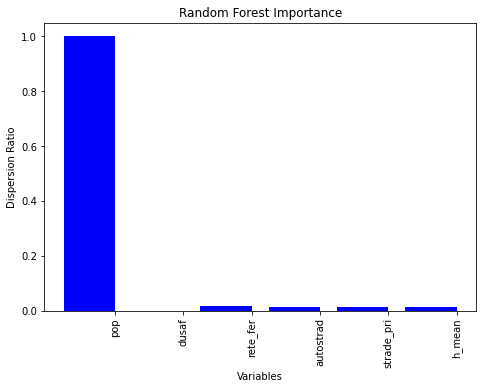

In [12]:
m.RF_importance(X_train, y_train, labels)

### Recursive Feature Selection
The goal of RFE is to select features by recursively considering smaller and smaller sets of features.
The final output for each variable will be:
* Its *label*;
* A *boolean expressing* whetever is selected or not;
* *Ranking value* based on its score;

In [13]:
m.recursive_feature_selection(X_train, y_train.astype(int), labels, 5)

Label: pop, Selected=True, Rank: 1
Label: dusaf, Selected=False, Rank: 2
Label: rete_fer, Selected=True, Rank: 1
Label: autostrad, Selected=True, Rank: 1
Label: strade_pri, Selected=True, Rank: 1
Label: h_mean, Selected=True, Rank: 1


## Multiscale Geographically Weighted Regression
Due to the fact that this study is related to geographic and spatial data, each pieces of data is very sensitive to the geographic distance between them. So the use of mgwr methods could be innovative, since multivariate models are increasingly encountered in geographical research to estimate spatially varying relationships between a targets and its predictive variables.




In [ ]:
m.mgwr(data, langs)


21
bw: 114.0


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]